## Newton-Raphson in $n$-Dimensions

In one dimension, the Newton-Raphson method finds the solution to the equation
\begin{equation*}
	f(x) = 0,
\end{equation*}
where $x \in \mathbb{R}$, using the iteration
\begin{equation*}
	x_{k+1} = x_k - \frac{f(x_k)}{f ' (x_k)}.
\end{equation*}
We must provide an initial point, $x_0$, to start the iteration.

This can be generalized to solving the $n$-dimensional equation
\begin{equation*}
	\bold{f(x)} = \bold{0},
\end{equation*}
where $\bold{f} : \mathbb{R}^n \rightarrow \mathbb{R}^n$ and $\bold{x} \in \mathbb{R}^n$.
Newton's method now takes the form
\begin{equation*}
	\bold{x_{k+1}} = \bold{x_k} - \bold{J_f(x_k)}^{-1} \bold{f(x_k)},
\end{equation*}
where $\bold{J_f}$ is the Jacobian matrix.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from time import perf_counter

from newton import n_dim_newton_method

Example for system of 3 nonlinear equations in 3 unknowns: 

\begin{align*}
	3x_1 - \cos(x_2 x_3) - \frac{1}{2} &= 0  \\
	x_1^2 - 81(x_2 + 0.1)^2 + \sin x_3 + 1.06 &= 0 \\
	\exp^{- x_1 x_2} + 20x_3 + \frac{10\pi - 3}{3} &= 0
\end{align*}

In [2]:
def f1(x):
	return 3*x[0] - np.cos(x[1]*x[2]) - 0.5

def f2(x):
	return x[0]**2 - 81*(x[1] + 0.1)**2 + np.sin(x[2]) + 1.06

def f3(x):
	return np.exp(-x[0]*x[1]) + 20*x[2] + (10*np.pi - 3)/3

In [3]:
funcs = [f1, f2, f3]
initial_guess = [0.1, 0.1, -0.1]

start = perf_counter()
solution = n_dim_newton_method(funcs, initial_guess, history=True)
end = perf_counter()

print(f"Solution: {solution[-1]}")
print(f"Converged in {len(solution)-1} iterations")
print(f"Time taken: {end - start:.6f} seconds")

Solution: [ 5.00000000e-01  2.05215445e-18 -5.23598776e-01]
Converged in 6 iterations
Time taken: 0.000939 seconds


We can verify that the solution given by Newton's method does indeed satisfy Equations (1) - (3) in the example.

In [4]:
print(f"f1 at solution: {f1(solution[-1])}")
print(f"f2 at solution: {f2(solution[-1])}")
print(f"f3 at solution: {f3(solution[-1])}")

f1 at solution: 0.0
f2 at solution: 0.0
f3 at solution: 1.7763568394002505e-15


Example:

\begin{align*}
	4 x_1^2 - 20 x_1 + \frac{1}{4} x_2^2 &= 0 \\
	\frac{1}{2} x_1 x_2^2 + 2x_1 - 5x_2 + 8 &= 0
\end{align*}

In [5]:
def f1(x):
	return 4*x[0]**2 - 20 * x[0] + 1/4 * x[1]**2

def f2(x):
	return 1/2 * x[0] * x[1]**2 + 2*x[0] - 5*x[1] + 8

In [6]:
start = perf_counter()
solution = n_dim_newton_method([f1, f2], [0.1, 0.1], history=True)
end = perf_counter()

print(f"Solution: {solution[-1]}")
print(f"Converged in {len(solution)-1} iterations")
print(f"Time taken: {end - start:.6f} seconds")

print('')

print(f"f1 at solution: {f1(solution[-1])}")
print(f"f2 at solution: {f2(solution[-1])}")

Solution: [0.03310318 1.62194979]
Converged in 5 iterations
Time taken: 0.000475 seconds

f1 at solution: 0.0
f2 at solution: 0.0


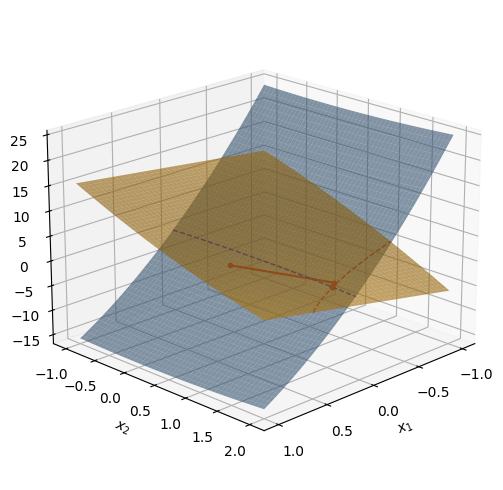

In [7]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 2, 200)
X, Y = np.meshgrid(x, y)
Z1 = f1([X, Y])
Z2 = f2([X, Y])

ax.plot_surface(
	X, Y, Z1,
	color="xkcd:sky blue",
	alpha=0.6,
	linewidth=0
)
ax.contour(
	X, Y, Z1,
	levels=[0],
	colors="blue",
	linewidths=1,
	linestyles='dashed'
)

ax.plot_surface(
	X, Y, Z2,
	color="orange",
	alpha=0.6,
	linewidth=0
)
ax.contour(
	X, Y, Z2,
	levels=[0],
	colors="red",
	linewidths=1,
	linestyles='dashed'
)

ax.plot(solution[:,0], solution[:,1], f1([solution[:,0], solution[:,1]]), color="red", marker="o", markersize=3)

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")

ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])

ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

## Applications to Optimization Problems

Consider a multivariable function $f : \mathbb{R}^n \rightarrow \mathbb{R}$. If we want to find a turning point of such a function, we take the partial derivative of the function with respect to each of the $n$ variables. This results in a system of (in general nonlinear) equations
\begin{equation*}
	\frac{\partial f}{\partial x_1} = 0 \space, ... \space , \frac{\partial f}{\partial x_n} = 0.
\end{equation*}
When we apply Newton's method in $n$-dimensions for this problem we obtain
\begin{equation*}
	\bold{x_{k+1}} = \bold{x_k} - \bold{H}^{-1}_f(x_k) \nabla f (x_k),
\end{equation*}
where $\bold{H}_f$ is the Hessian matrix.

In [8]:
from newton import newton_method_optimization
from utils import plot3d

Example (Rosenbrock Function):

\begin{equation*}
	f(x, y) = (a - x)^2 + b (y - x^2)^2, \quad a, b \in \mathbb{R}
\end{equation*}

In [9]:
def rosenbrock(x, a=1, b=100):
	return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

In [10]:
initial_guess = [-1.0, 0.0]

start = perf_counter()
solution = newton_method_optimization(rosenbrock, initial_guess, history=True)
end = perf_counter()

print(f"Solution: {solution[-1]}")
print(f"Converged in {len(solution)-1} iterations")
print(f"Time taken: {end - start:.6f} seconds")

Solution: [0.99999998 0.99999996]
Converged in 8 iterations
Time taken: 0.000872 seconds


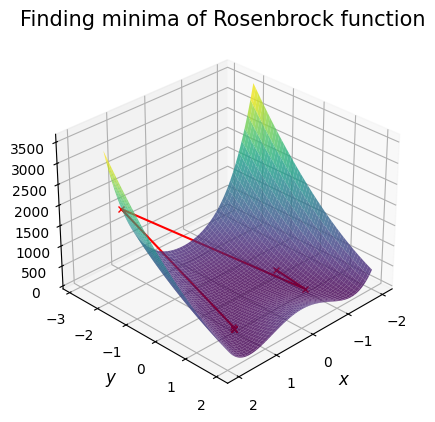

In [11]:
fig, ax = plot3d(rosenbrock, (-2, 2), (-2, 2))

ax.plot(solution[:,0], solution[:,1], rosenbrock([solution[:,0], solution[:,1]]), color="red", marker="x", markersize=5)

ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.set_title("Finding minima of Rosenbrock function", fontsize=15)

ax.view_init(elev=30, azim=45)
plt.show()

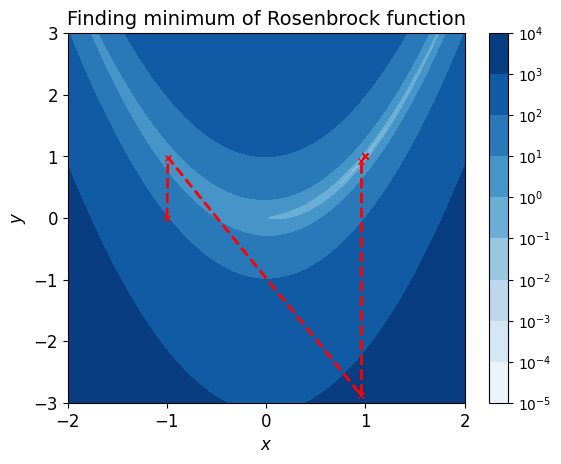

In [12]:
from matplotlib import ticker

x = np.linspace(-2, 2, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot()

cs = ax.contourf(
	X, Y, rosenbrock([X, Y]),
	levels=40,
	cmap="Blues",
	locator=ticker.LogLocator()
)
cbar = fig.colorbar(cs)

ax.plot(solution[:,0], solution[:, 1], color="red", marker="x", markersize=5, linewidth=2, linestyle="--")

ax.set_title("Finding minimum of Rosenbrock function", fontsize=14)
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.tick_params(labelsize=12)

plt.show()

For $a = 1, \space b = 100$, this function has a minimum a (1, 1) which Newton's method converges to in spite of the sub-optimal initial guess.

### Optimal Warehouse Positioning

A company needs to place a central warehouse at coordinates $(x, y)$ to serve $n$ retail cities located at fixed positions $P_1, P_2,$, ..., $P_n$. However, to make it more complex (and non-linear), the transportation cost isn't just distance; it scales exponentially due to refrigeration requirements or fuel consumption curves.

1. The Variables
- $x$: The x-coordinate of the warehouse
- $y$: The y-coordinate of the warehouse
- $z$: The capacity scale (or "throughput") of the warehouse

2. The Non-Linear Objective Function: We want to minimize the total cost $f(x, y, z)$, which includes the distance-based shipping cost and the operating cost of the facility:

$$f(x, y, z) = \sum_{i=1}^{n} w_i \cdot e^{\sqrt{(x-x_i)^2 + (y-y_i)^2}} + \frac{\alpha z^2}{x^2 + y^2 + 1} + \beta z \ln(z)$$

In [13]:
cities = [(0, 0), (1, 3), (4, 3), (6, 1), (3, 0)]	# Example city coordinates
weights = [1, 1, 2, 3, 2]

def obj(x, alpha=0.5, beta=5):
	total = 0
	n = len(cities)
	for i in range(n):
		xi, yi = cities[i]
		total += weights[i] * np.sqrt((x[0] - xi)**2 + (x[1] - yi)**2)
	
	total += alpha * x[2]**2 / (x[0]**2 + x[1]**2 + 1) + beta * x[2] * np.log(x[2])
	return total

In [14]:
start = perf_counter()
solution = newton_method_optimization(obj, [1.0, 1.0, 1.0], history=True)
end = perf_counter()

print(f"Solution: {solution[-1]}")
print(f"Converged in {len(solution)-1} iterations")
print(f"Time taken: {end - start:.6f} seconds")

Solution: [3.97480648 1.36387435 0.36643736]
Converged in 39 iterations
Time taken: 0.008530 seconds


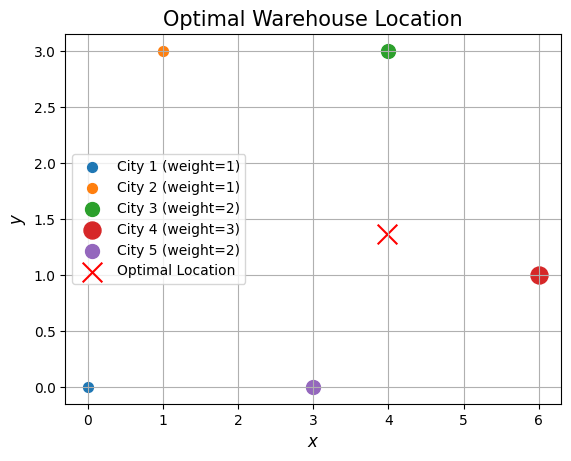

In [15]:
fig = plt.figure()

ax = fig.add_subplot()

for i, city in enumerate(cities):
	ax.scatter(*city, s=50 * weights[i], label=f"City {i+1} (weight={weights[i]})")

ax.scatter(solution[-1][0], solution[-1][1], s=200, color="red", marker="x", label="Optimal Location")

ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)

ax.set_title("Optimal Warehouse Location", fontsize=15)

ax.grid()
ax.legend()
plt.show()

In [16]:
from IPython.core.magic import register_cell_magic

# Allows skipping of cellings using %%skip command
@register_cell_magic
def skip(line, cell):
	return